# Stacked LSTM

In [41]:
import random as random
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
def get_sequence(length):
    freq = 5
    noise = [random.uniform(-0.3,0.3) for i in range(length)]
    sequence = [np.sin(2 * np.pi * freq * (i/length)) for i in range(length)]
    signal = np.array(noise) + np.array(sequence)
    return signal

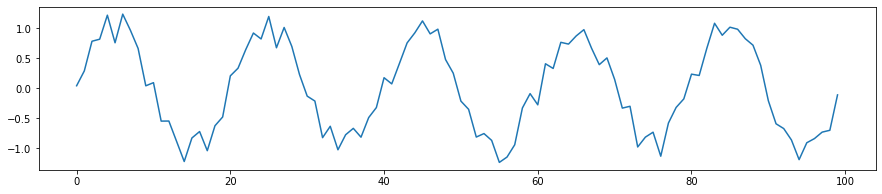

In [43]:
# Plot sequence
sequence = get_sequence(100)
plt.figure(figsize = [15,3])
plt.plot(sequence)
plt.show()


In [44]:
def generate_examples(length, n_samples, output):
    
    X, y = list(), list()
    
    for k in range(n_samples):
        
        sequence = get_sequence(length + output)
        
        X.append(sequence[:-output])
        y.append(sequence[-output:])
        
    X = np.array(X).reshape(n_samples, length,1)
    y = np.array(y).reshape(n_samples, output)
    
    return X, y

In [45]:
X,y = generate_examples(length=100, n_samples=50, output=5)

In [46]:
X.shape, y.shape

((50, 100, 1), (50, 5))

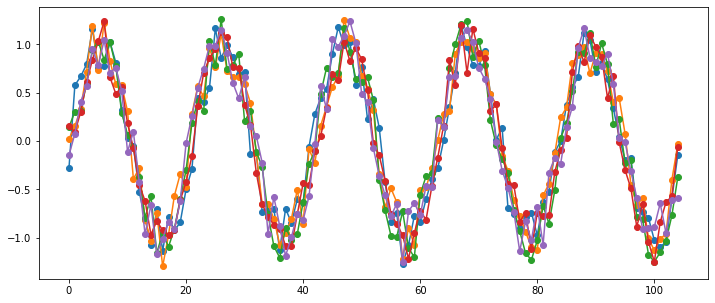

In [47]:
plt.figure(figsize =(12,5))
X, y = generate_examples(100, 5, 5)
for i in range(len(X)):
    plt.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o') 
plt.show() 

### Model

In [48]:
# Example of one output for whole sequence
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [58]:
# configure problem
sequence_length = 1000
cell_unit = 100
output_length = 250

In [ ]:
# define model
model = Sequential(name ='self-attention-lstm')

model.add(LSTM(100,return_sequences=True,\
               input_shape=(sequence_length, 1),\
               name='input-layer'))

model.add(LSTM(100,return_sequences=True,\
               name = 'hidden-layer-1'))

model.add(LSTM(100,return_sequences=True,\
               name = 'hidden-layer-2'))

model.add(LSTM(100, name = 'hidden-layer-3'))

model.add(Dense(output_length, name = 'dense-layer'))


# compile
model.compile(loss='mean_squared_error',\
              optimizer='rmsprop',\
              metrics='accuracy')


print(model.summary())

In [60]:
#First Layer
n = 1 #input vetor x
m = 100 # unit in LSTM
g = 4 # no of neuron layers inside LSTM total 4
parameters = g*(n+m+1)*m
print(parameters)

40800


In [61]:
#Second,Third and Fourth Layer
n = 100 #input vetor x
m = 100 # unit in LSTM
g = 4 # no of neuron layers inside LSTM total 4
parameters = g*(n+m+1)*m
print(parameters)

80400


In [62]:
#Dense Layer
n = 100 #input vetor x
m = 250 # output vector size also equal to number of bias

parameters = n*m + m
print(parameters)

25250


Note that output of last LSTM is considerd for dense layer

### Train the Model

In [63]:
sequence_length = 1000
output_length = 250

In [64]:
X, y = generate_examples(sequence_length, 1000, output_length)
XX,yy = generate_examples(sequence_length, 200, output_length)

In [66]:
history=model.fit(X, y,\
                  batch_size=10,\
                  validation_data = (XX,yy),\
                  epochs=5)

Epoch 1/5
2/2 [==============================] - 15s 9s/step - loss: 0.5211 - accuracy: 0.0000e+00 - val_loss: 0.4002 - val_accuracy: 0.0050
Epoch 2/5
2/2 [==============================] - 9s 8s/step - loss: 0.3246 - accuracy: 0.0000e+00 - val_loss: 0.1617 - val_accuracy: 0.0950
Epoch 3/5
2/2 [==============================] - 9s 8s/step - loss: 0.1323 - accuracy: 0.1000 - val_loss: 0.0765 - val_accuracy: 0.0950
Epoch 4/5
2/2 [==============================] - 9s 8s/step - loss: 0.0652 - accuracy: 0.2000 - val_loss: 0.0487 - val_accuracy: 0.0950
Epoch 5/5
2/2 [==============================] - 9s 8s/step - loss: 0.0430 - accuracy: 0.1000 - val_loss: 0.0389 - val_accuracy: 0.0950


In [67]:
print(history.history)

{'loss': [0.521059513092041, 0.32455530762672424, 0.13225646317005157, 0.06516040861606598, 0.042992278933525085], 'accuracy': [0.0, 0.0, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612], 'val_loss': [0.4001595377922058, 0.1617065817117691, 0.0764760673046112, 0.048676904290914536, 0.03893260657787323], 'val_accuracy': [0.004999999888241291, 0.0949999988079071, 0.0949999988079071, 0.0949999988079071, 0.0949999988079071]}


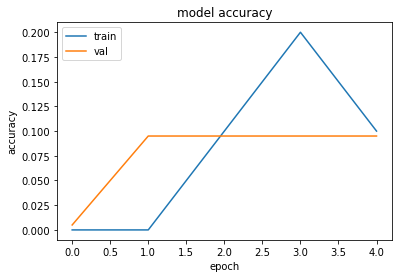

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

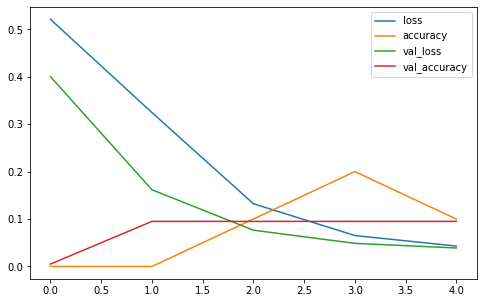

In [69]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

### Test the model

In [70]:
X, y = generate_examples(sequence_length, 100, output_length) 
loss = model.evaluate(X, y, verbose=0)
loss

[0.03916557505726814, 0.009999999776482582]

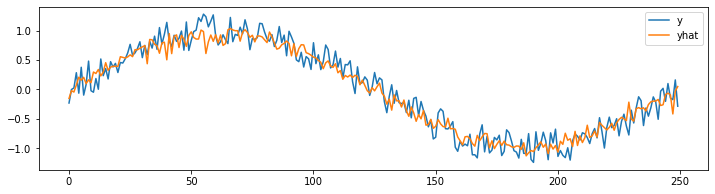

In [71]:
# prediction on new data
X, y = generate_examples(sequence_length, 20, output_length) 
yhat = model.predict(X, verbose=0)

plt.figure(figsize = [12,3])
plt.plot(y[0], label='y') 
plt.plot(yhat[0], label='yhat') 
plt.legend()
plt.show()


### Weight Matrices

In [72]:
for array in model.layers[0].get_weights():
    print (array.shape)

(1, 400)
(100, 400)
(400,)


In [73]:
for array in model.layers[1].get_weights():
    print (array.shape)

(100, 400)
(100, 400)
(400,)


In [74]:
for array in model.layers[2].get_weights():
    print (array.shape)

(100, 400)
(100, 400)
(400,)


In [75]:
for array in model.layers[3].get_weights():
    print (array.shape)

(100, 400)
(100, 400)
(400,)


In [76]:
for array in model.layers[4].get_weights():
    print (array.shape)

(100, 250)
(250,)
